In [35]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt


# Keras API
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense,Dropout,Flatten
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator


In [36]:
# Function to get count of images
def get_files(directory):
    if not os.path.exists(directory):
        return 0
    count = 0
    for current_path, dirs, files in os.walk(directory):
        for dr in dirs:
            count += len(glob.glob(os.path.join(current_path, dr + "/*")))
    return count

data_dir = 'Dataset/'
alphabets = sorted(os.listdir(data_dir))

# Count the number of classes
num_classes = len(alphabets)

# Count the number of images in the dataset
total_images = get_files(data_dir)

In [37]:
# Print the count of classes and images
print(num_classes, "Classes")
print(total_images, "Images")

26 Classes
130 Images


In [38]:
# Load and preprocess the data
image_paths = []
labels = []

for alphabet in alphabets:
    image_files = os.listdir(os.path.join(data_dir, alphabet))
    for image_file in image_files:
        image_paths.append(os.path.join(data_dir, alphabet, image_file))
        labels.append(alphabet)

In [39]:
# Split the data
train_image_paths, valid_image_paths, train_labels, valid_labels = train_test_split(
    image_paths, labels, test_size=0.2, stratify=labels, random_state=42)

# Create a data generator for preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 200,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [40]:
# Define the target size for resizing
img_width,img_height =200,200
input_shape=(img_width,img_height,3)

# Load and preprocess the images
x_train = np.array([keras.preprocessing.image.img_to_array(keras.preprocessing.image.load_img(image_path, target_size=input_shape)) for image_path in train_image_paths])
x_valid = np.array([keras.preprocessing.image.img_to_array(keras.preprocessing.image.load_img(image_path, target_size=input_shape)) for image_path in valid_image_paths])

# Normalize the pixel values
x_train = x_train / 200.0
x_valid = x_valid / 200.0

In [42]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))

In [43]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 196, 196, 32)      2432      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 65, 65, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 63, 63, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 64)       

In [44]:

# Convert string labels to numerical labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)

# Convert numerical labels to one-hot encoded categorical labels
train_labels_categorical = to_categorical(train_labels_encoded, num_classes=num_classes)

# Convert string labels to numerical labels for validation data
valid_labels_encoded = label_encoder.transform(valid_labels)

# Convert numerical labels to one-hot encoded categorical labels for validation data
valid_labels_categorical = to_categorical(valid_labels_encoded, num_classes=num_classes)


In [45]:
# Train the model
model.fit(x_train, train_labels_categorical, epochs=10)

Epoch 1/10
4/4 [==============================] - 6s 925ms/step - loss: 3.3275 - accuracy: 0.0288
Epoch 2/10
4/4 [==============================] - 4s 870ms/step - loss: 3.2728 - accuracy: 0.0096
Epoch 3/10
4/4 [==============================] - 4s 903ms/step - loss: 3.2773 - accuracy: 0.0096
Epoch 4/10
4/4 [==============================] - 4s 836ms/step - loss: 3.2453 - accuracy: 0.0192
Epoch 5/10
4/4 [==============================] - 4s 835ms/step - loss: 3.2382 - accuracy: 0.0288
Epoch 6/10
4/4 [==============================] - 4s 880ms/step - loss: 3.1956 - accuracy: 0.1442
Epoch 7/10
4/4 [==============================] - 4s 929ms/step - loss: 3.1048 - accuracy: 0.2212
Epoch 8/10
4/4 [==============================] - 4s 867ms/step - loss: 2.9159 - accuracy: 0.1731
Epoch 9/10
4/4 [==============================] - 4s 942ms/step - loss: 2.5829 - accuracy: 0.3365
Epoch 10/10
4/4 [==============================] - 4s 929ms/step - loss: 2.1816 - accuracy: 0.4327


In [46]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_valid, valid_labels_categorical)
print(f'Test accuracy: {test_accuracy}')


1/1 [==============================] - 1s 716ms/step - loss: 1.9994 - accuracy: 0.3846
Test accuracy: 0.38461539149284363


## Layers visualization

In [51]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d_6', 'max_pooling2d_6', 'conv2d_7', 'max_pooling2d_7', 'conv2d_8', 'max_pooling2d_8', 'flatten_2', 'dense_6', 'dropout_2', 'dense_7', 'dense_8']


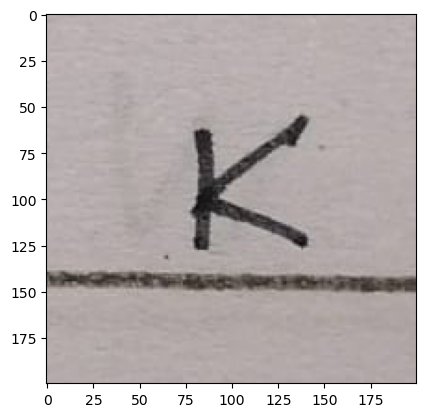

In [96]:
# Take one image to visualize it's changes after every layer
from keras.preprocessing import image
import numpy as np
img1 = image.load_img('Dataset/K/5.png')
plt.imshow(img1);

#preprocess image
img1 = image.load_img('Dataset/K/5.png', target_size=(200, 200))
img = image.img_to_array(img1)
img = img/200
img = np.expand_dims(img, axis=0)
# Now 'img' contains the preprocessed image at 200x200 pixels

In [97]:
# Visualizing output after every layer.
from keras.models import Model
conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_6').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_6').output)
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_7').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_7').output)
conv2d_3_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_8').output)
max_pooling2d_3_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_8').output)
flatten_1_output = Model(inputs=model.input,outputs=model.get_layer('flatten_2').output)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
conv2d_3_features = conv2d_3_output.predict(img)
max_pooling2d_3_features = max_pooling2d_3_output.predict(img)
flatten_1_features = flatten_1_output.predict(img)
     

1/1 [==============================] - 0s 123ms/step


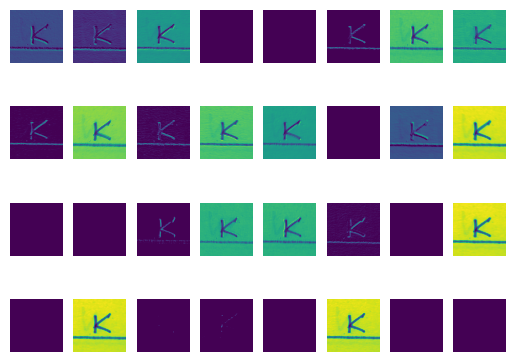

In [98]:
import matplotlib.pyplot as plt

# Assuming conv2d_1_features has shape (1, 196, 196, 32)
feature_maps = conv2d_1_features[0]  # Extract the feature maps from the batch dimension

# Iterate over the feature maps
for i in range(32):  # Assuming you have 32 feature maps
    plt.subplot(4, 8, i+1)  # You can adjust the number of rows and columns as needed
    plt.imshow(feature_maps[ :, :, i], cmap='viridis')  # Use an appropriate colormap
    plt.axis('off')

plt.show()
